# Slugging Percentages
## Author: Matthew Chin (2021)

**Data**
https://github.com/chadwickbureau/baseballdatabank

In [ ]:
# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py

# Cufflinks wrapper on plotly
import cufflinks

# Data science imports
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 999

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# from __future__ import print_function, division
import matplotlib as mpl
import matplotlib.pyplot as plt


from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')

## Slugging Percentage

A batter's slugging percentage involves not only how frequently but how far they get on base when they hit. When they go to bat and they get on base safely with a hit, it increases their chances at getting home. In that case, one's slugging percentage will go up if they hit a single, but goes even farther up if they get on safely with an extra base hit (XBH) or with a home run and touch all four bases. 

Extra base hits and home runs matter for the significance of one's slugging percentage because the power and speed of a batter are considered to know how many bases they touch per at-bat.  

Walks or base on balls (BB) are not considered because they are not hits. 

The formula for slugging is as follows 
(Reference: https://www.mlb.com/glossary/standard-stats/slugging-percentage#:~:text=Definition,hits%20are%20not%20valued%20equally.):

Let $1B$ be a single, $2B$ be a double, $3B$ be a triple, and $HR$ be a home run. 

The formula is:

$SLG = \frac{1B + (2\times2B) + (3\times3B )+ (4\times HR)}{AB}$


In [ ]:
# Get slugging percentages from Batting data
slugpct = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv",sep=',')

In [ ]:
# Get batters who are sluggers from People data
slugppl = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv",sep=',')

In [ ]:
# Sample of slugpct beginning or end values
# Later cells are the most recent statistics

# slugpct.head()
slugpct.tail()


In [ ]:
# Show dataframe values
slugpct

In [ ]:
# Print array values
slugarr = slugpct.to_numpy()
slugarr

In [ ]:
# Keep these columns names
slugpct.columns

In [ ]:
import csv
fcsv = "slugpctAL_2019.csv"
fcsv2 = "slugpctNL_2019.csv"
mean_ba = "mean_ba.csv"
# len(slugpct)
# len(slugarr)

<h1>Abbreviations</h1>

G       Games played<br>
AB      At-bats<br>
R       Runs<br>
H       Hits<br>
B       Singles (1 base)<br>
2B      Doubles (2 bases)<br>
3B      Triples (3 bases)<br>
HR      Home Runs (4 bases)<br>
RBI     Runs Batted In<br>
SB      Stolen Bases<br>
CS      Caught Stealing<br>
BB      Base on Balls/Walks<br>
SO      Struck Out<br>
IBB     Intentional Base on Balls/Intentional Walks<br>
HBP     Hit By Pitch<br>
SH      Sacrifice Bunt<br>
SF      Sacrifice Fly<br>
GIDP    Grounded Into Double Play<br>
BA      Batting Average<br>
SLG     Slugging Percentage<br>
OBP     On-Base Percentage<br>
OPS     On-base percentage Plus Slugging<br>


In [ ]:
# Take 2019 data
# Get data from American League (AL) in players with at least 50 ABs & 25 hits
# Write to new CSV file called 'slugpct.csv'

# # old columns:
# 'playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
#        '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
#        'SF', 'GIDP'

newrows = ['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 
            'H', 'B', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 
            'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'BA', 'SLG', 'OBP', 'OPS'
            ]

In [ ]:
# AL 2019 data
# AL slugging pct in 2019 by players with at least 50 ABs & 25 hits

with open(fcsv, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(newrows)
    for a in slugarr:
        if a[1] == 2019 and a[4] == 'AL' and a[6] >= 50 and a[8] >= 25:
            slg = ((a[8]-(a[9]+a[10]+a[11])) + (2*a[9]) + (3*a[10]) + (4*a[11]))/a[6]
            bavg = a[8]/a[6]
            obp = (a[8] + a[15] + a[18]) / (a[6] + a[15] + a[18] + a[20])
            ops = obp + slg
            csvwriter.writerow([a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7], a[8],
                (a[8]-(a[9]+a[10]+a[11])), a[9], a[10], a[11], a[12], a[13], a[14], a[15], 
                a[16], a[17], a[18], a[19], a[20], a[21], 
                bavg, slg, obp, ops])

In [ ]:
# AL 2019 data in Pandas dataframe

al_sluggers = pd.read_csv(fcsv)
# al_sluggers

In [ ]:
# NL 2019 data
# NL slugging pct in 2019 by players with at least 50 ABs & 25 hits


with open(fcsv2, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(newrows)
    for a in slugarr:   
        if a[1] == 2019 and a[4] == 'NL' and a[6] >= 50 and a[8] >= 25:
            slg = ((a[8]-(a[9]+a[10]+a[11])) + (2*a[9]) + (3*a[10]) + (4*a[11]))/a[6]
            bavg = a[8]/a[6]
            obp = (a[8] + a[15] + a[18]) / (a[6] + a[15] + a[18] + a[20])
            ops = obp + slg
            csvwriter.writerow([a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7], a[8],
                (a[8]-(a[9]+a[10]+a[11])), a[9], a[10], a[11], a[12], a[13], a[14], a[15], 
                a[16], a[17], a[18], a[19], a[20], a[21], 
                bavg, slg, obp, ops])

In [ ]:
# NL 2019 BA

nl_sluggers = pd.read_csv(fcsv2)
plt.xlabel("At Bats")
plt.ylabel("Hits")
plt.title("NL Batters Batting Average, 2019")
plt.scatter(nl_sluggers.AB, nl_sluggers.H)
plt.show()

In [ ]:
# Test Scatterplot 1
%matplotlib inline

plt.scatter(slugpct.H, slugpct.AB)

In [ ]:
# AL 2019 BA 
plt.xlabel("At Bats")
plt.ylabel("Hits")
plt.title("AL Batters Batting Average, 2019")
plt.scatter(al_sluggers.AB, al_sluggers.H)
plt.show()

In [ ]:
# slugpct.yearID
# 150 years total
yr = 1871 # First year statistics were recorded in baseball
slugpct.tail()
# slugarr

In [ ]:
# Calculate the mean batting average of all players in the past 150 MLB seasons

avg_ba = 0
pplct = 0
add_ab = 0
add_h = 0
yr = 1871 
# yr_counter = 0

with open(mean_ba, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Year', 'Total Batters', 'Mean AB', 'Mean H', 'Mean BA'])
    for a in slugarr:
        
        if a[1] == yr:
            pplct += 1
            add_ab += a[6]
            add_h += a[8]
        else:
            csvwriter.writerow([yr, pplct, add_ab, add_h, add_h/add_ab])
            yr += 1
            avg_ba = 0
            pplct = 0
            add_ab = 0
            add_h = 0
    avg_ba = 0
    pplct = 0
    add_ab = 0
    add_h = 0
    for a in slugarr:
        if a[1] == 2020:
            pplct += 1
            add_ab += a[6]
            add_h += a[8]
    csvwriter.writerow([yr, pplct, add_ab, add_h, add_h/add_ab])


In [ ]:
year_ba = pd.read_csv(mean_ba)
year_ba.tail()

In [ ]:
# Show mean batting average in line graph

%matplotlib inline
plt.plot(year_ba['Year'], year_ba['Mean BA'])
plt.title("Leaguewide Batting Average")
plt.xlabel("Year of Season")
plt.ylabel("Mean Batting Average")
plt.show()



<h1>On-Base Percentage (OBP)</h1>

On-Base Percentage (OBP) is a batter's average of how often they get on base. Statistics not only include hits and extra base hits, but consider walks (base on balls/BBs), intentional walks (IBBs), hit-by-pitches (HBPs), and sacrifice flies (SFs).

Equation:
OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies) 

$OBP = \frac{H + BB + HBP}{AB + BB + HBP + SF}$


In [ ]:
# Take Brandon Crawford's (SF; 'crawfbr01') stats
# 10 years of stats, make array of size 10
bcraw_stats = [None] * 10
counter = 0

for a in slugarr:
    if a[0] == 'crawfbr01':
        bcraw_stats[counter] = a
        # print(a)
        counter+=1
# bcraw_stats.loc
# # Add 2021 stats[
# bc35_stats_21 = [array(['crawfbr01', 2021, 1, 'SFN', 'NL', 138, 483, 79, 144, 30, 3, 24, 90, 11, 3, 56, 105, 6, 5, 0, 5, 8])]

# bcraw_stats[10] = bc35_stats_21
# bcraw_stats


We will use Brandon Crawford's statistics from the 2011 to 2020 seasons. He is a shortstop for the San Francisco Giants.

To calculate Crawford's career slugging percentage, we will take the hits, walks, hit-by-pitches, at-bats, and sacrifice flies in his career.

In [ ]:
bc35_stats = pd.DataFrame(bcraw_stats)
bc35_stats.rename(columns={0:'playerID', 1:'yearID', 2:'stint', 3:'teamID', 4:'lgID', 5:'G', 6:'AB', 7:'R', 8:'H',
       9:'2B', 10:'3B', 11:'HR', 12:'RBI', 13:'SB', 14:'CS', 15:'BB', 16:'SO', 17:'IBB', 18:'HBP', 19:'SH',
       20:'SF', 21:'GIDP'}, inplace=True)

# bc35_stats.append(bc35_stats_21)
bc35_stats

In [ ]:
bc35_stats.describe()

In [ ]:
bc_ab = bc35_stats['AB'].sum()
bc_h = bc35_stats['H'].sum()
bc_b = bc_h - (bc35_stats['2B'].sum() + bc35_stats['3B'].sum() + bc35_stats['HR'].sum())
bc_hbp = bc35_stats['HBP'].sum()
bc_bb = bc35_stats['BB'].sum()
bc_sf = bc35_stats['SF'].sum()


In [145]:
bc_obp = (bc_h + bc_bb + bc_hbp) / (bc_ab + bc_bb + bc_hbp + bc_sf)
print("Crawford career OBP:",bc_obp)

bc_yrs = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
# bc35_stats

Crawford career OBP: 0.3166156982670744


In [140]:
# OBP per season
bc_obp10 = [None] * 10
counter = 0
for a in bcraw_stats:
    bc_obp10[counter] = (a[8] + a[15] + a[18]) / (a[6] + a[15] + a[18] + a[20])
    counter += 1
bc_obp10


[0.2876712328767123,
 0.3037974683544304,
 0.3114754098360656,
 0.3238434163701068,
 0.32085561497326204,
 0.3418940609951846,
 0.30526315789473685,
 0.32491582491582494,
 0.30357142857142855,
 0.32642487046632124]

Text(0.5, 0, 'Season')

Text(0, 0.5, 'On Base Percentage')

Text(0.5, 1.0, 'Brandon Crawford OBP, 2011-2020')

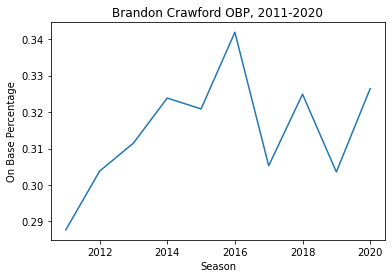

In [146]:
# OBP over the years

plt.plot(bc_yrs, bc_obp10)
plt.xlabel("Season")
plt.ylabel("On Base Percentage")
plt.title("Brandon Crawford OBP, 2011-2020")
plt.show()


<h1>On-Base Plus Slugging (OPS)</h1>

On-base Plus Slugging (OPS) is a percentage statistic commonly used in Sabermetrics to determine how much of an impact that a baseball player has on their team in terms of scoring and generating baserunners to get to home plate and score. 

Generally, an OPS percentage of $.800$ is a bare minimum for most MLB All-Stars; winners of the American League or National League Most Valuable Player Awards given at the end of each season usually have OPS of a range between at least .920 and 1.000 in that season.

$OPS = OBP + SLG$

We will continue to use Brandon Crawford's stats. 

In [ ]:
bc_slg = (bc_b + (2*bc35_stats['2B'].sum()) + (3*bc35_stats['3B'].sum()) + (4*bc35_stats['HR'].sum())) / bc_ab

print("Crawford career OBP:",bc_obp, 
"\nCrawford career SLG:", bc_slg, 
"\nCrawford career OPS:", bc_obp + bc_slg)

In [138]:
bc35_stats

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,crawfbr01,2011,1,SFN,NL,66,196,22,40,5,2,3,21.0,1.0,3.0,23,31.0,1.0,0.0,1.0,0.0,4.0
1,crawfbr01,2012,1,SFN,NL,143,435,44,108,26,3,4,45.0,1.0,4.0,33,95.0,6.0,3.0,2.0,3.0,4.0
2,crawfbr01,2013,1,SFN,NL,149,499,52,124,24,3,9,43.0,1.0,2.0,42,96.0,6.0,5.0,1.0,3.0,10.0
3,crawfbr01,2014,1,SFN,NL,153,491,54,121,20,10,10,69.0,5.0,3.0,59,129.0,10.0,2.0,2.0,10.0,4.0
4,crawfbr01,2015,1,SFN,NL,143,507,65,130,33,4,21,84.0,6.0,4.0,39,119.0,9.0,11.0,0.0,4.0,18.0
5,crawfbr01,2016,1,SFN,NL,155,553,67,152,28,11,12,84.0,7.0,0.0,57,115.0,10.0,4.0,0.0,9.0,13.0
6,crawfbr01,2017,1,SFN,NL,144,518,58,131,34,1,14,77.0,3.0,5.0,42,113.0,3.0,1.0,0.0,9.0,18.0
7,crawfbr01,2018,1,SFN,NL,151,531,63,135,28,2,14,54.0,4.0,5.0,50,122.0,13.0,8.0,0.0,5.0,12.0
8,crawfbr01,2019,1,SFN,NL,147,500,58,114,24,2,11,59.0,3.0,2.0,53,117.0,5.0,3.0,0.0,4.0,10.0
9,crawfbr01,2020,1,SFN,NL,54,172,26,44,12,0,8,28.0,1.0,2.0,15,47.0,2.0,4.0,0.0,2.0,3.0


In [142]:
# SLG per season
bc_slg10 = [None] * 10
counter = 0
for a in bcraw_stats:
    singles = a[8] - (a[9] + a[10] + a[11])
    bc_slg10[counter] = (singles + (2*a[9]) + (3*a[10]) + (4*a[11])) / (a[6])
    counter += 1

bc_slg10

[0.29591836734693877,
 0.34942528735632183,
 0.3627254509018036,
 0.3890020366598778,
 0.46153846153846156,
 0.43037974683544306,
 0.4034749034749035,
 0.3935969868173258,
 0.35,
 0.46511627906976744]

Text(0.5, 0, 'Season')

Text(0, 0.5, 'Slugging Percentage')

Text(0.5, 1.0, 'Brandon Crawford SLG, 2011-2020')

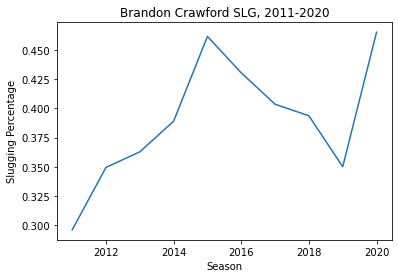

In [147]:
# SLG over the years

plt.plot(bc_yrs, bc_slg10)
plt.xlabel("Season")
plt.ylabel("Slugging Percentage")
plt.title("Brandon Crawford SLG, 2011-2020")
plt.show()


In [149]:
# OPS per season

bc_ops10 = [None] * 10
counter = 0
for a in bc_obp10:
    bc_ops10[counter] = bc_obp10[counter] + bc_slg10[counter]
    counter += 1

bc_ops10

[0.5835896002236511,
 0.6532227557107522,
 0.6742008607378691,
 0.7128454530299846,
 0.7823940765117237,
 0.7722738078306277,
 0.7087380613696403,
 0.7185128117331507,
 0.6535714285714285,
 0.7915411495360887]

Text(0.5, 0, 'Season')

Text(0, 0.5, 'On Base Plus Slugging')

Text(0.5, 1.0, 'Brandon Crawford OPS, 2011-2020')

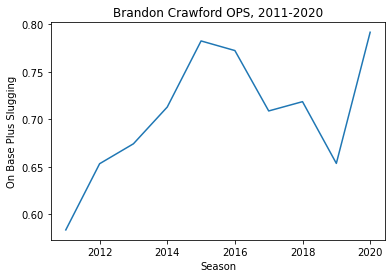

In [150]:
# SLG over the years

plt.plot(bc_yrs, bc_ops10)
plt.xlabel("Season")
plt.ylabel("On Base Plus Slugging")
plt.title("Brandon Crawford OPS, 2011-2020")
plt.show()
